#**TF, IDF, এবং TF-IDF ভেক্টরাইজার:**

### **১. TF (Term Frequency):**  
- **টার্ম ফ্রিকোয়েন্সি (TF)** হলো একটি শব্দ (term) **কতবার** একটি ডকুমেন্টে (যেমন: একটি বাক্য বা প্যারাগ্রাফ) এসেছে সেটার পরিমাপ।  
- **সূত্র:**  
  `TF(term, document) = (Number of times term appears in the document) / (Total terms in the document)`  

- **উদাহরণ:**  
  - ডকুমেন্ট: "আমি বই পড়ি আর বই ভালোবাসি"  
  - "বই" শব্দটি এসেছে **২ বার**, মোট শব্দ সংখ্যা **৬ টি**।  
  - `TF("বই") = 2/6 = 0.33`  

---

### **২. IDF (Inverse Document Frequency):**  
- **ইনভার্স ডকুমেন্ট ফ্রিকোয়েন্সি (IDF)** হলো একটি শব্দ **কতগুলো ডকুমেন্টে** এসেছে সেটার বিপরীত পরিমাপ। এটি **rare শব্দকে বেশি গুরুত্ব** দেয়।  
- **সূত্র:**  
  `IDF(term) = log(Total number of documents / Number of documents containing the term)`  

- **উদাহরণ:**  
  - ধরুন, আপনার কাছে **৩ টি ডকুমেন্ট** আছে:  
    1. "আমি বই পড়ি"  
    2. "আমি গান গাই"  
    3. "বই আর গান"  
  - "বই" শব্দটি এসেছে **২ টি ডকুমেন্টে** (ডকুমেন্ট ১ ও ৩)।  
  - `IDF("বই") = log(3/2) ≈ 0.176`  

---

### **৩. TF-IDF (Term Frequency-Inverse Document Frequency):**  
- **TF-IDF** হলো TF এবং IDF এর গুণফল। এটি শব্দের **মূল্যায়ন** করে ২ ভাবে:  
  1. **লোকাল ইম্পর্ট্যান্স (TF):** একটি ডকুমেন্টে শব্দের ফ্রিকোয়েন্সি।  
  2. **গ্লোবাল ইম্পর্ট্যান্স (IDF):** সব ডকুমেন্টে শব্দের বিরলতা।  

- **সূত্র:**  
  `TF-IDF(term, document) = TF(term, document) * IDF(term)`  

- **উদাহরণ:**  
  - উপরের উদাহরণে, ডকুমেন্ট ১-এ "বই" এর TF-IDF:  
    `TF-IDF = 0.33 * 0.176 ≈ 0.058`  

---

### **কেন TF-IDF ব্যবহার করব?**  
- **Count Vectorizer** শুধু শব্দের গণনা করে। কিন্তু **TF-IDF** শব্দের **প্রাসঙ্গিকতা (relevance)** মাপে।  
- **যেমন:** "এবং", "হয়" এর মতো কমন শব্দের TF বেশি হলেও IDF কম (কারণ সব ডকুমেন্টে আছে), তাই তাদের TF-IDF স্কোর কম হয়।  

---

### **TF-IDF এর ব্যবহার:**  
- **সার্চ ইঞ্জিন:** কোন ডকুমেন্ট রিলেভেন্ট তা বোঝার জন্য।  
- **টেক্সট ক্লাসিফিকেশন:** যেমন নিউজ ক্যাটেগরাইজেশন।  
- **কীওয়ার্ড এক্সট্রাকশন:** ডকুমেন্টের গুরুত্বপূর্ণ শব্দ বের করা।  

---

### **সীমাবদ্ধতা:**  
- শব্দের **অর্থ** বা **সম্পর্ক** (যেমন: প্রতিশব্দ) বুঝতে পারে না।  
- বড় ডেটাসেটে **কম্পিউটেশনালি এক্সপেনসিভ** হতে পারে।

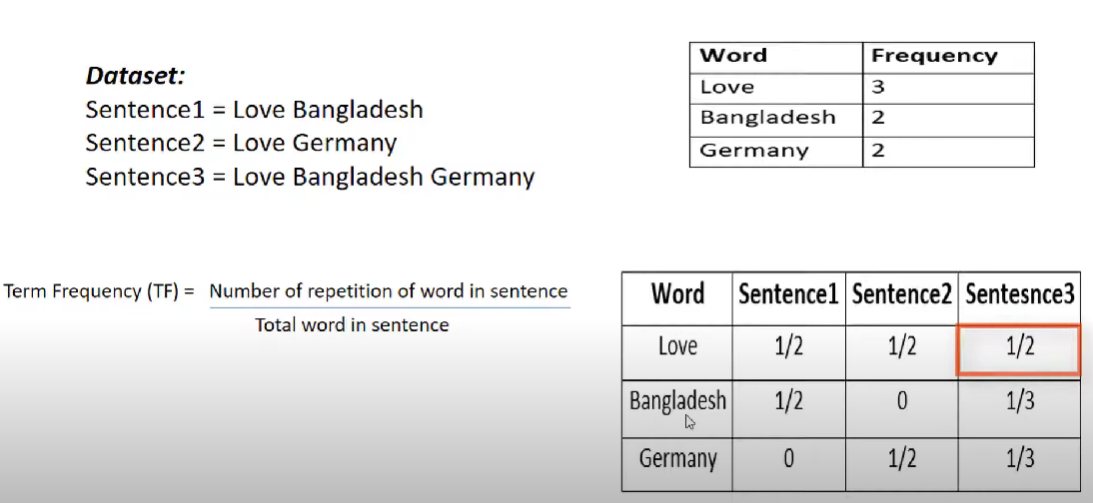

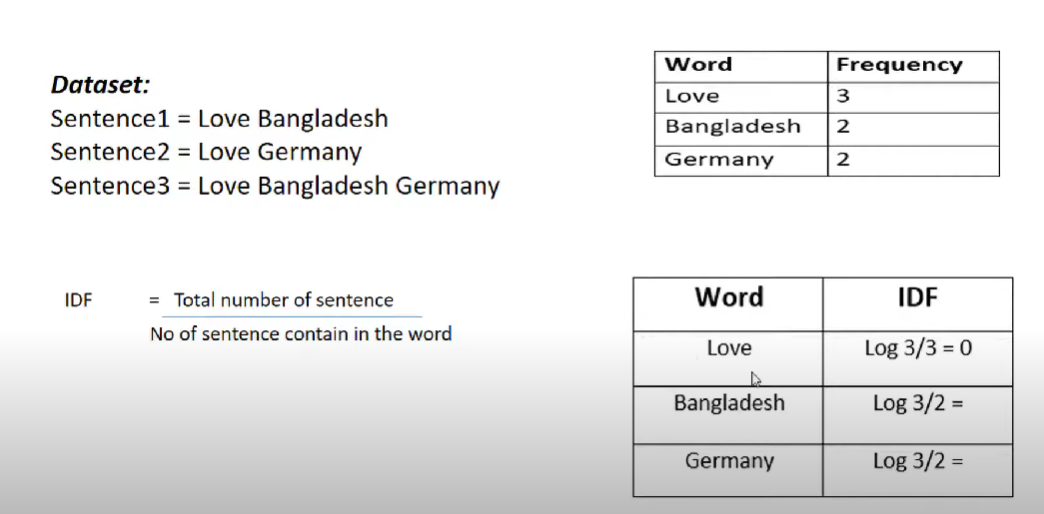

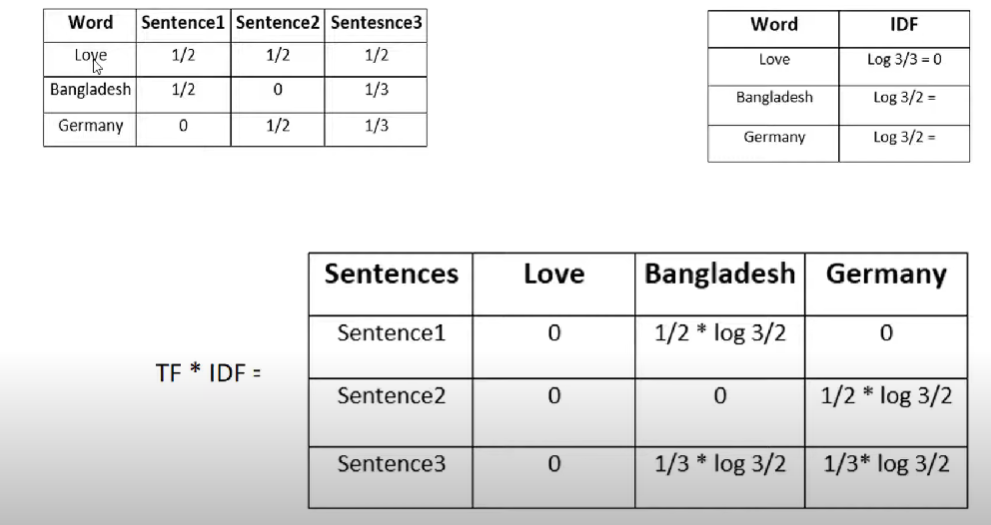

In [1]:
from IPython.display import Image, display


image_files = [
   '/content/Screenshot_20250310_114747.png',
   '/content/Screenshot_20250310_114758.png',
   '/content/Screenshot_20250310_114809.png'
]


for image_file in image_files:
    display(Image(filename=image_file))

**কাউন্ট ভেক্টরাইজার vs. TF-IDF: কখন কোনটি ব্যবহার করবেন?**  

---

### **১. কাউন্ট ভেক্টরাইজার (When to Use?)**  
- **সাধারণ কেস:** শব্দের **ফ্রিকোয়েন্সি (কতবার এসেছে)** গুরুত্বপূর্ণ হলে।  
- **যেমন:**  
  - **স্পাম ডিটেকশন:** নির্দিষ্ট শব্দ (যেমন: "ফ্রি", "অফার") বার বার আসলে স্পাম হতে পারে।  
  - **টেক্সট ক্লাসিফিকেশন** যেখানে শব্দের উপস্থিতিই প্রধান (যেমন: রোগ শনাক্তকরণে লক্ষণ)।  
- **সীমাবদ্ধতা:** কমন শব্দ (যেমন: "এবং", "হয়") বেশি প্রাধান্য পায়।  

---

### **২. TF-IDF ভেক্টরাইজার (When to Use?)**  
- **সাধারণ কেস:** শব্দের **প্রাসঙ্গিক গুরুত্ব (relevance)** মাপতে হলে।  
- **যেমন:**  
  - **সার্চ ইঞ্জিন:** "জাভা" শব্দটি যদি "কফি" ডকুমেন্টে কম এবং "প্রোগ্রামিং" ডকুমেন্টে বেশি থাকে, TF-IDF সেটা ক্যাপচার করে।  
  - **ডকুমেন্ট সিমিলারিটি:** দুটি ডকুমেন্টের মধ্যে গুরুত্বপূর্ণ শব্দ মিল আছে কিনা।  
- **সীমাবদ্ধতা:** কম্পিউটেশনালি একটু ভারী, ছোট ডেটাসেটে অতিরিক্ত ফিট হতে পারে।  

---

### **কম্প্যারিজন টেবিল:**  
| **পরামিতি**               | **Count Vectorizer**                     | **TF-IDF**                              |  
|---------------------------|------------------------------------------|-----------------------------------------|  
| **ফোকাস**                 | শব্দের সংখ্যা                          | শব্দের প্রাসঙ্গিক গুরুত্ব             |  
| **কমন শব্দ**              | বেশি প্রাধান্য পায়                     | কম প্রাধান্য পায় (IDF দিয়ে স্কেল করা) |  
| **ইউস কেস**               | বেসিক মডেল, শব্দের উপস্থিতি           | সার্চ, সিমিলারিটি, ক্লাসিফিকেশন       |  
| **কম্পিউটেশন কস্ট**       | কম                                      | একটু বেশি                             |  

---


### **সারাংশ (Summary):**  
- **Count Vectorizer:** সরল, দ্রুত, কিন্তু শব্দের গুরুত্ব বিচার করে না।  
- **TF-IDF:** শব্দের গুরুত্ব বাড়ায়, কিন্তু একটু স্লো।  
- **হ্যাশিং/এমবেডিং:** বড় ডেটা বা সিম্যান্টিক অ্যানালাইসিসের জন্য।  


In [4]:
# Count Vectorizer

from sklearn.feature_extraction.text import CountVectorizer

documents = ["I read Books", "I sing songs", "Books and songs"]
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(documents)

print("Vocabulary:", vectorizer.get_feature_names_out())
print("Count Matrix:\n", count_matrix.toarray())


Vocabulary: ['and' 'books' 'read' 'sing' 'songs']
Count Matrix:
 [[0 1 1 0 0]
 [0 0 0 1 1]
 [1 1 0 0 1]]


In [5]:
# TF-IDF Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

documents = ["I read Books", "I sing songs", "Books and songs"]
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

print("Vocabulary:", tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())


Vocabulary: ['and' 'books' 'read' 'sing' 'songs']
TF-IDF Matrix:
 [[0.         0.60534851 0.79596054 0.         0.        ]
 [0.         0.         0.         0.79596054 0.60534851]
 [0.68091856 0.51785612 0.         0.         0.51785612]]
